| Google Colab | GitHub |
| :---: | :---: |
| <a target="_blank" href="https://colab.research.google.com/github/sadrasabouri/pyrandwalk/blob/master/Document/Document.ipynb"><img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" height="50px" weight="50px" /><br>Run in Google Colab</a> | <a target="_blank" href="https://github.com/sadrasabouri/pyrandwalk/blob/master/Document/Document.ipynb"><img src="https://i.ibb.co/xfJbPmL/github.png"  height="50px" weight="50px" style="padding-bottom:5px;"/><br>View Source on GitHub</a> |

# Pyrandwalk Document

### Version : 1.0
-----

## Table of contents

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Installation">Installation</a></li>
        <ol>
            <li><a href="#Source-code">Source Code</a></li>
            <li><a href="#PyPI">PyPI</a></li>
        </ol>
    <li><a href="#Usage">Usage</a></li>
        <ol>
            <li><a href="#RandomWalk">RandomWalk</a></li>
            <li><a href="#prob_sec">prob_sec</a></li>
            <li><a href="#run">run</a></li>
            <li><a href="#final_dist">final_dist</a></li>
            <li><a href="#is_irreducible">is_irreducible</a></li>
            <li><a href="#trans_power">trans_power</a></li>     
            <li><a href="#get_edges">get_edges</a></li>
            <li><a href="#get_graph">get_graph</a></li>
            <li><a href="#plot_graph">plot_graph</a></li>
            <li><a href="#get_typeof_classes">get_typeof_classes</a></li>
            <li><a href="#best_policy">best_policy</a></li>
        </ol>
    <li><a href="#Examples">Examples</a></li>
    <li><a href="#References">References</a></li>
</ul>

## Overview

Pyrandwalk is an educational tool for simulating random walks, calculating the probability of given state sequences, etc. Random walk is a representation of the discrete-time, discrete-value Markov chain model used in stochastic processes.

## Installation

### Source code
- Download [Version 1.0](https://github.com/sadrasabouri/pyrandwalk/archive/v1.0.zip) or [Latest Source ](https://github.com/sadrasabouri/pyrandwalk/archive/dev.zip)
- Run `pip install -r requirements.txt` or `pip3 install -r requirements.txt` (Need root access)
- Run `python3 setup.py install` or `python setup.py install` (Need root access)

### PyPI

- Check [Python Packaging User Guide](https://packaging.python.org/installing/)
- Run `pip install pyrandwalk` or `pip3 install pyrandwalk` (Need root access)


## Usage

In [1]:
!pip -q -q install pyrandwalk==1.0
from pyrandwalk import *
import numpy as np

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


### RandomWalk

Imagine bellow random walk which in it you have five states ({0, 1, 2, 3, 4}) as bellow:
<br>
<div align="center">
<img src="https://raw.githubusercontent.com/sadrasabouri/pyrandwalk/master/Otherfiles/usage_example.webp" weight="400" height="400">
</div>
<br>
In this random walk you can only loop back in state 0 (absorbing state). In other states you can move to near states by the probability given on each edge.
<br>
<br>
So let's make a RandomWalk object from this random walk:

In [2]:
states = [0, 1, 2, 3, 4]
trans = np.array([[1,    0, 0,    0, 0],
                  [0.25, 0, 0.75, 0, 0],
                  [0, 0.25, 0, 0.75, 0],
                  [0, 0, 0.25, 0, 0.75],
                  [0, 0,    0, 1,    0]])
rw = RandomWalk(states, trans)

In [3]:
rw.S

[0, 1, 2, 3, 4]

In [4]:
rw.P

array([[1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.75, 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.75, 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.75],
       [0.  , 0.  , 0.  , 1.  , 0.  ]])

### prob_sec

With this method you can calculate the probability of a given sequence:

In [5]:
rw.prob_sec([2, 1, 0])

0.0125

In [6]:
rw.prob_sec([2, 1, 0], initial_dist=[0, 0, 1, 0, 0])

0.0625

<ul>
    <li> <span style="color:red;">Notice </span> :  `initial_dist` (the initial distribution of the sequence) is came by order respected to states and has a uniform distribution by default.</li>
</ul>

### run

Run a random walk:

In [7]:
states, probs = rw.run()

In [8]:
states

[3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 3]

In [9]:
probs

[0.2, 0.75, 1.0, 0.25, 0.25, 0.75, 0.75, 0.75, 1.0, 0.75, 1.0]

In [10]:
states, probs = rw.run(ntimes=20)

In [11]:
states

[3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3]

In [12]:
probs

[0.2,
 0.75,
 1.0,
 0.75,
 1.0,
 0.25,
 0.75,
 0.75,
 1.0,
 0.75,
 1.0,
 0.75,
 1.0,
 0.25,
 0.75,
 0.75,
 1.0,
 0.75,
 1.0,
 0.75,
 1.0]

<ul>
    <li> <span style="color:red;">Notice </span> :  `ntimes` (number of steps which the random walk is going to run) is a integer (default value 10).</li>
</ul>

In [13]:
states, probs = rw.run(show=True)

2 --> 1  (p = 0.250)
1 --> 2  (p = 0.750)
2 --> 3  (p = 0.750)
3 --> 4  (p = 0.750)
4 --> 3  (p = 1.000)
3 --> 2  (p = 0.250)
2 --> 1  (p = 0.250)
1 --> 0  (p = 0.250)
0 --> 0  (p = 1.000)
0 --> 0  (p = 1.000)


In [14]:
states

[2, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0]

In [15]:
probs

[0.2, 0.25, 0.75, 0.75, 0.75, 1.0, 0.25, 0.25, 0.25, 1.0, 1.0]

<ul>
    <li> <span style="color:red;">Notice </span> :  `show` (a flag which sets if we want to have a transition log) is a boolean (default value False).</li>
</ul>

### final_dist

Calculate final distribution of the random walk:

In [16]:
rw.final_dist()

array([1., 0., 0., 0., 0.])

<ul>
    <li> <span style="color:red;">Notice </span> : added in version 1.</li>
</ul>

In [17]:
rw.final_dist(precision=10**(-2))

array([1., 0., 0., 0., 0.])

<ul>
    <li> <span style="color:red;">Notice </span> : `precision` if float number indecating the precision of final distribution (default value 10**(-10)).</li>
</ul>

### is_irreducible

Check if a random walk is irreducible:

In [18]:
rw.is_irreducible()

False

### trans_power

Return nth power of random walk transition matrix:

In [19]:
rw.trans_power(2)

array([[1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.25  , 0.1875, 0.    , 0.5625, 0.    ],
       [0.0625, 0.    , 0.375 , 0.    , 0.5625],
       [0.    , 0.0625, 0.    , 0.9375, 0.    ],
       [0.    , 0.    , 0.25  , 0.    , 0.75  ]])

### get_edges

Return edges of random walk's graph:

In [20]:
rw.get_edges()

[(0, 0, 1.0),
 (1, 0, 0.25),
 (1, 2, 0.75),
 (2, 1, 0.25),
 (2, 3, 0.75),
 (3, 2, 0.25),
 (3, 4, 0.75),
 (4, 3, 1.0)]

### get_graph

Return generated graph using networkx:

In [21]:
rw_graph = rw.get_graph()

### plot_graph

Plot the random walk graph:

<AxesSubplot:title={'center':'My Random Walk Graph'}>

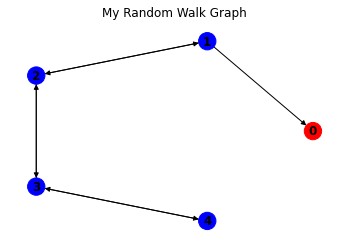

In [22]:
rw.plot_graph()

### get_typeof_classes

Return type of classes of the random walk:

In [23]:
rw_class_types = rw.get_typeof_classes()

In [24]:
rw_class_types['recurrent']

([0], array([[1.]]))

In [25]:
rw_class_types['transient'][0]

[1, 2, 3, 4]

In [26]:
rw_class_types['transient'][1]

array([[0.  , 0.75, 0.  , 0.  ],
       [0.25, 0.  , 0.75, 0.  ],
       [0.  , 0.25, 0.  , 0.75],
       [0.  , 0.  , 1.  , 0.  ]])

### best_policy

For making the best policy problems for your random walk you can easily:

In [27]:
states = [0, 1, 2]
trans = np.array([[1, 0, 0], [1/2, 0, 1/2], [0, 1, 0]])
rw = RandomWalk(states, trans, payoff=[0, 1, 4], cost=[1, 0, 2], discount=0.5)
rw.best_policy()

{'continue': [], 'stop': [0, 1, 2]}

## Examples

We have already seen a example of using pyrandwalk in <a href="#Usage">Usage</a> section. If you want to see more examples including some solved exercises from references:

<br>

| Google Colab | GitHub |
| :---: | :---: |
| <a target="_blank" href="https://colab.research.google.com/github/sadrasabouri/pyrandwalk/blob/master/Document/Examples.ipynb"><img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" height="50px" weight="50px" /><br>Examples on Google Colab</a> | <a target="_blank" href="https://github.com/sadrasabouri/pyrandwalk/blob/master/Document/Examples.ipynb"><img src="https://i.ibb.co/xfJbPmL/github.png"  height="50px" weight="50px" style="padding-bottom:5px;"/><br>Examples on GitHub</a> |


## Reference

<blockquote>1- Gregory F.Lawler, "Introduction to Stochastic Processes".</blockquote>
<blockquote>2- [Markusfeng](https://markusfeng.com/projects/graph/), "Graph / Finite State Machine Designer".</blockquote>
<div>Icon made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>
